# Carga y comprobaciones del Dataset
Este Jupyter Notebook se encarga de realizar la carga del dataset abierto sobre estadísticas de productos petrolíferos de CNMC Data que proporciona una serie temporal multivariante con información sobre las exportaciones mensuales, expresadas en toneladas métricas, de productos derivados del petróleo. El dataset contiene registros desde enero de 2003 hasta la actualidad.

Por otro lado, realizaremos la comprobación de que la serie temporal es no-estacional, seleccionando una o varias variables objetivo no estacionales.

## Carga y preprocesamiento del Dataset

#### Importación de bibliotecas necesarias

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

#### Carga del dataset desde local

In [58]:
# Cargamos el dataset desde el archivo csv
data = pd.read_csv("ds_2943_1.csv", delimiter=';', parse_dates=['Fecha'])

# Aseguramos que la columna de fechas tiene el tipo correcto y establecemos un periodo mensual tal y como aparece en el dataset original
data['Fecha'] = pd.to_datetime(data['Fecha'], format='%Y-%m').dt.to_period('M')

data.head()

,Fecha,Tipo Producto,Exportaciones Tm
0,2003-01,BIODIESEL,0
1,2003-01,GASÓLEO A,38444
2,2003-01,GASÓLEO B,2019
3,2003-01,GASÓLEO C,5
4,2003-01,OTROS GASOLEOS,68


#### Exploración y tratamiento inicial de los datos

In [59]:
print("Resumen estadístico general del dataset:\n")
print(data.describe())

Resumen estadístico general del dataset:

       Exportaciones Tm
count       3626.000000
mean       68790.864865
std        93379.416504
min            0.000000
25%         1870.500000
50%        20950.500000
75%       116996.750000
max       640121.000000


In [60]:
print("Información general del dataset:\n")
print(data.info())

Información general del dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3626 entries, 0 to 3625
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype    
---  ------            --------------  -----    
 0   Fecha             3626 non-null   period[M]
 1   Tipo Producto     3626 non-null   object   
 2   Exportaciones Tm  3626 non-null   int64    
dtypes: int64(1), object(1), period[M](1)
memory usage: 85.1+ KB
None


In [61]:
print("Valores únicos en cada columna del dataset:")
for column in data.columns:
    unique_values = data[column].unique()
    print(f"\n·{column}: {unique_values}")

Valores únicos en cada columna del dataset:

·Fecha: <PeriodArray>
['2003-01', '2003-02', '2003-03', '2003-04', '2003-05', '2003-06', '2003-07',
 '2003-08', '2003-09', '2003-10',
 ...
 '2023-10', '2023-11', '2023-12', '2024-01', '2024-02', '2024-03', '2024-04',
 '2024-05', '2024-06', '2024-07']
Length: 259, dtype: period[M]

·Tipo Producto: ['BIODIESEL' 'GASÓLEO A' 'GASÓLEO B' 'GASÓLEO C' 'OTROS GASOLEOS'
 'BIOETANOL' 'GASOLINA  AUTO. S/PB 95 I.O.' 'GASOLINA  AUTO. S/PB 98 I.O.'
 'OTRAS GASOLINAS' 'FUELÓLEO  BIA' 'OTROS FUELÓLEOS' 'QUEROSENO AVIACIÓN'
 'OTROS QUEROSENOS' 'GLP']

·Exportaciones Tm: [     0  38444   2019 ... 131155  21024   7583]


In [62]:
print("Valores únicos en cada columna del dataset:")
for column in data.columns:
    unique_values = data[column].unique()
    print(f"\n·{column}: {unique_values}")

Valores únicos en cada columna del dataset:

·Fecha: <PeriodArray>
['2003-01', '2003-02', '2003-03', '2003-04', '2003-05', '2003-06', '2003-07',
 '2003-08', '2003-09', '2003-10',
 ...
 '2023-10', '2023-11', '2023-12', '2024-01', '2024-02', '2024-03', '2024-04',
 '2024-05', '2024-06', '2024-07']
Length: 259, dtype: period[M]

·Tipo Producto: ['BIODIESEL' 'GASÓLEO A' 'GASÓLEO B' 'GASÓLEO C' 'OTROS GASOLEOS'
 'BIOETANOL' 'GASOLINA  AUTO. S/PB 95 I.O.' 'GASOLINA  AUTO. S/PB 98 I.O.'
 'OTRAS GASOLINAS' 'FUELÓLEO  BIA' 'OTROS FUELÓLEOS' 'QUEROSENO AVIACIÓN'
 'OTROS QUEROSENOS' 'GLP']

·Exportaciones Tm: [     0  38444   2019 ... 131155  21024   7583]


In [63]:
print("Verificamos valores nulos:")
print(data.isnull().sum())

print("\nVerificamos duplicados:")
duplicates = data.duplicated().sum()
print(f"Número de filas duplicadas: {duplicates}")

Verificamos valores nulos:
Fecha               0
Tipo Producto       0
Exportaciones Tm    0
dtype: int64

Verificamos duplicados:
Número de filas duplicadas: 0


## Visualización inicial
Visualizamos las exportaciones mensuales de cada derivado a lo largo del tiempo mediante gráficos individuales para cada producto. De esta forma, comprobaremos rápidamente las tendencias y patrones de los datos

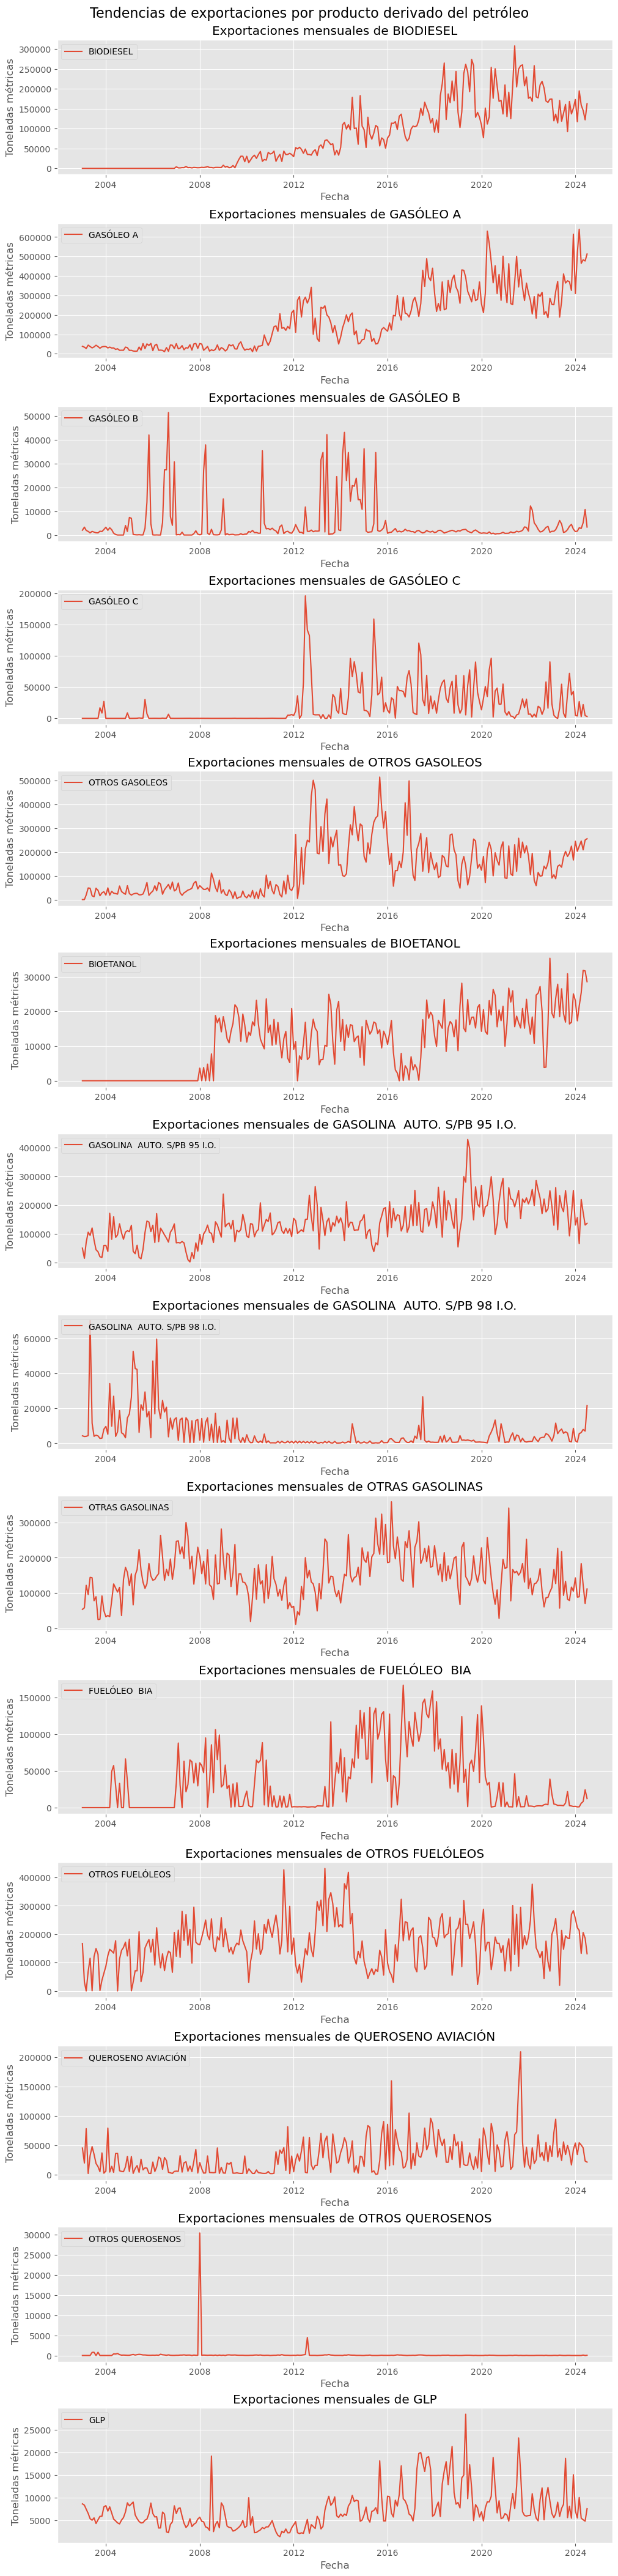

In [64]:
# Convertimos la columna 'Fecha' a tipo datetime para facilitar la visualización
data['Fecha'] = data['Fecha'].dt.to_timestamp()

# Obtenemos la lista de productos derivados
productos = data['Tipo Producto'].unique()

# Creamos los gráficos de líneas individuales para cada producto derivado
fig, axs = plt.subplots(nrows=len(productos), ncols=1, figsize=(10, len(productos) * 3), constrained_layout=True)

for i, producto in enumerate(productos):
    # Filtramos para el producto actual
    subset = data[data['Tipo Producto'] == producto]
    
    # Gráfico de línea
    axs[i].plot(subset['Fecha'], subset['Exportaciones Tm'], label=producto)
    axs[i].set_title(f"Exportaciones mensuales de {producto}")
    axs[i].set_xlabel("Fecha")
    axs[i].set_ylabel("Toneladas métricas")
    axs[i].legend(loc="upper left")

plt.suptitle("Tendencias de exportaciones por producto derivado del petróleo", fontsize=16)
plt.show()


#### Conclusiones iniciales
A partir del primer gráfico de líneas que representa las exportaciones mensuales de biodiésel, podemos observar varias tendencias clave. Entre 2003 y 2010, las exportaciones de biodiésel fueron bastante bajas y estables, con muy poca variación. A partir de 2010, las exportaciones comenzaron a aumentar, presentando una tendencia de crecimiento con oscilaciones periódicas. Entre 2015 y 2020, vemos un comportamiento más irregular con picos pronunciados y caídas rápidas, lo que indica variaciones significativas en la demanda o en la producción. El periodo de 2020 a 2024 muestra cierta estabilidad, aunque con fluctuaciones moderadas. Esta evolución podría reflejar cambios en la política energética, variaciones en la demanda global de biodiésel o la implementación de regulaciones en torno a los combustibles renovables

## Comprobaciones de no estacionalidad

#### 1. Prueba de Dickey-Fuller Aumentada (ADF)
Evalúa si cada serie temporal es estacionaria o no. Si el valor p es menor a 0.05, podemos rechazar la hipótesis nula y considerar que la serie es estacionaria. En caso contrario, la serie es no-estacionaria.

#### 2. Descomposición estacional
Realiza una descomposición de la serie para observar sus componentes de tendencia, estacionalidad y residuo. Esto puede ayudarnos a identificar visualmente si la serie presenta patrones estacionales.


Resultados del test ADF para BIODIESEL:
Estadístico ADF: -1.1440700158266515
Valor p: 0.6971813230040547
Valores críticos:
	1%: -3.457664132155201
	5%: -2.8735585105960224
	10%: -2.5731749894132916




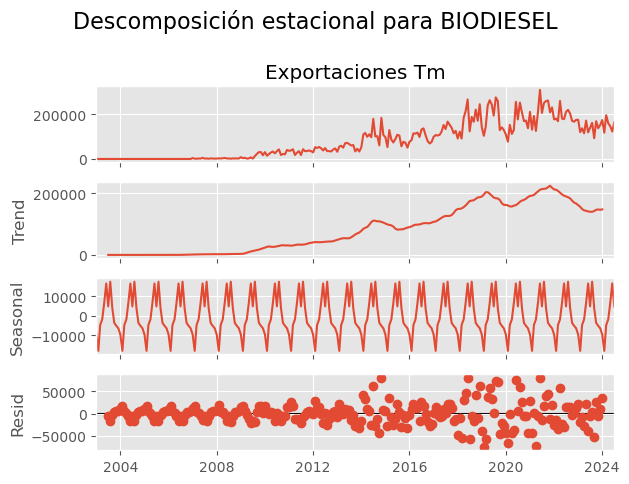

Resultados del test ADF para GASÓLEO A:
Estadístico ADF: -1.5407900247847062
Valor p: 0.5132453379679699
Valores críticos:
	1%: -3.4561550092339512
	5%: -2.8728972266578676
	10%: -2.5728222369384763




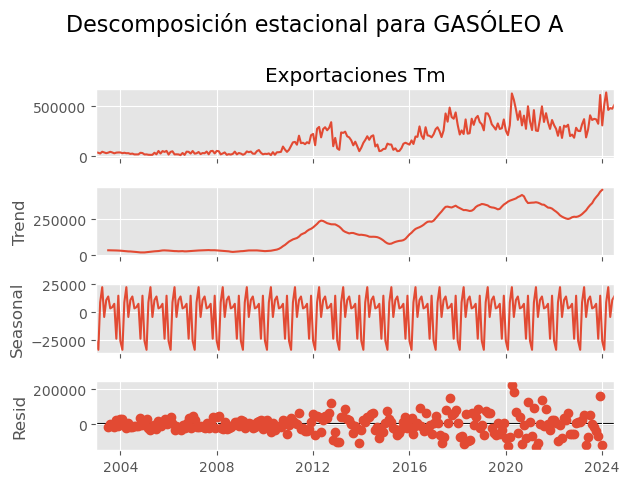

Resultados del test ADF para GASÓLEO B:
Estadístico ADF: -3.0899077844730165
Valor p: 0.02730912882379429
Valores críticos:
	1%: -3.457105309726321
	5%: -2.873313676101283
	10%: -2.5730443824681606




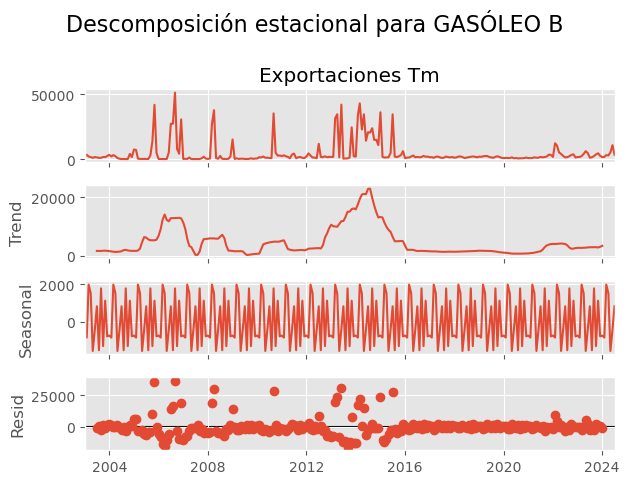

Resultados del test ADF para GASÓLEO C:
Estadístico ADF: -2.599647195493352
Valor p: 0.09307020688154405
Valores críticos:
	1%: -3.4569962781990573
	5%: -2.8732659015936024
	10%: -2.573018897632674




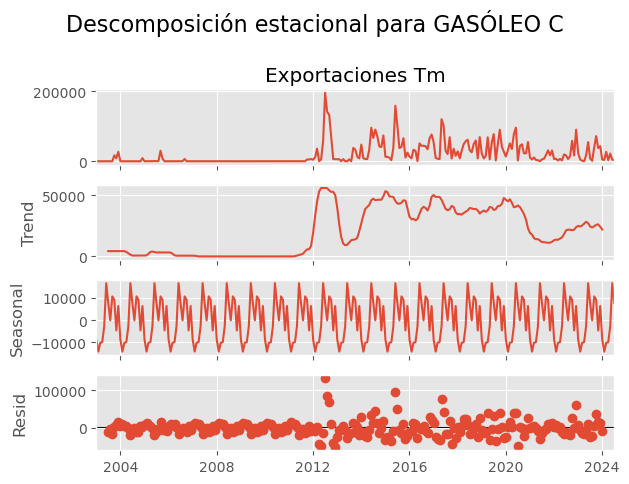

Resultados del test ADF para OTROS GASOLEOS:
Estadístico ADF: -1.593550556005933
Valor p: 0.48683246964640736
Valores críticos:
	1%: -3.4573260719088132
	5%: -2.873410402808354
	10%: -2.573095980841316




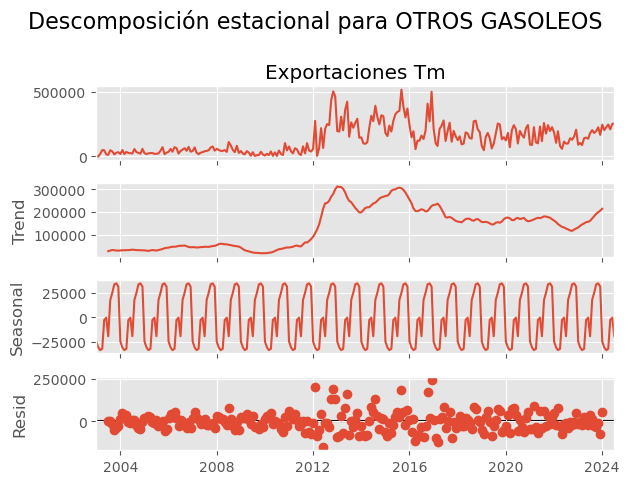

Resultados del test ADF para BIOETANOL:
Estadístico ADF: -1.389745044572726
Valor p: 0.5871824791439558
Valores críticos:
	1%: -3.4564641849494113
	5%: -2.873032730098417
	10%: -2.572894516864816




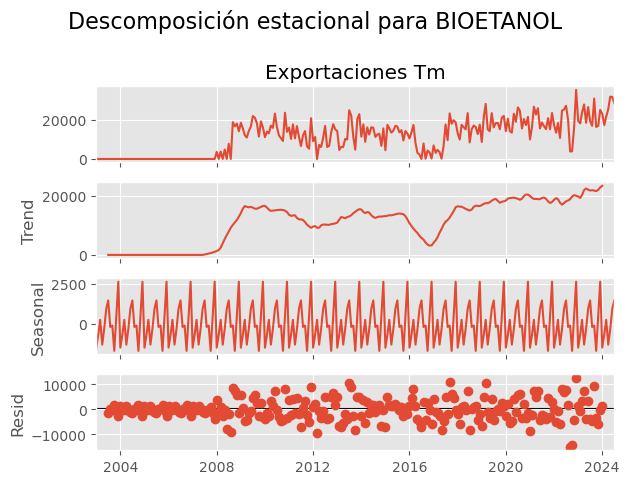

Resultados del test ADF para GASOLINA  AUTO. S/PB 95 I.O.:
Estadístico ADF: -2.8681941914179485
Valor p: 0.04917356402280004
Valores críticos:
	1%: -3.4564641849494113
	5%: -2.873032730098417
	10%: -2.572894516864816




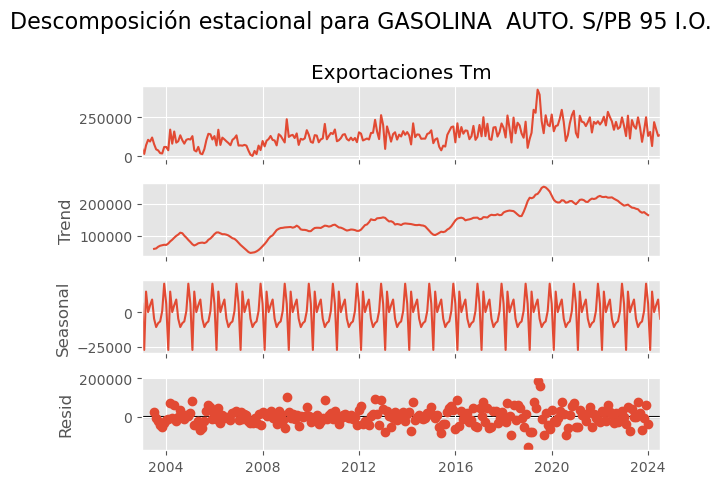

Resultados del test ADF para GASOLINA  AUTO. S/PB 98 I.O.:
Estadístico ADF: -2.0953483670401987
Valor p: 0.24638915575051445
Valores críticos:
	1%: -3.457664132155201
	5%: -2.8735585105960224
	10%: -2.5731749894132916




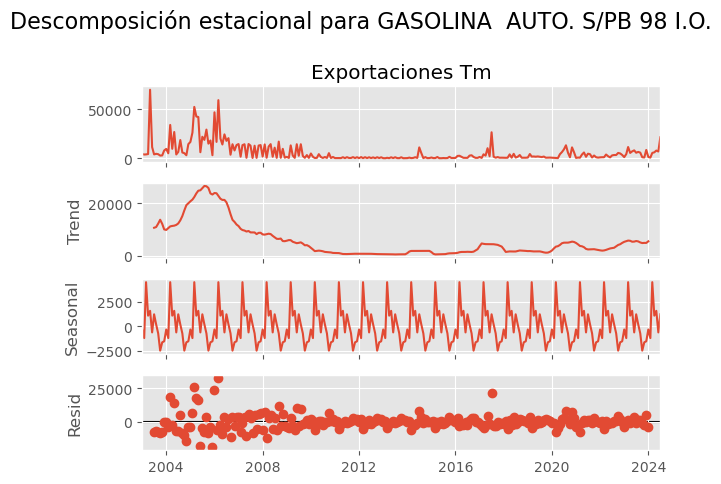

Resultados del test ADF para OTRAS GASOLINAS:
Estadístico ADF: -2.5175729168147836
Valor p: 0.11125697950169022
Valores críticos:
	1%: -3.4568881317725864
	5%: -2.8732185133016057
	10%: -2.5729936189738876




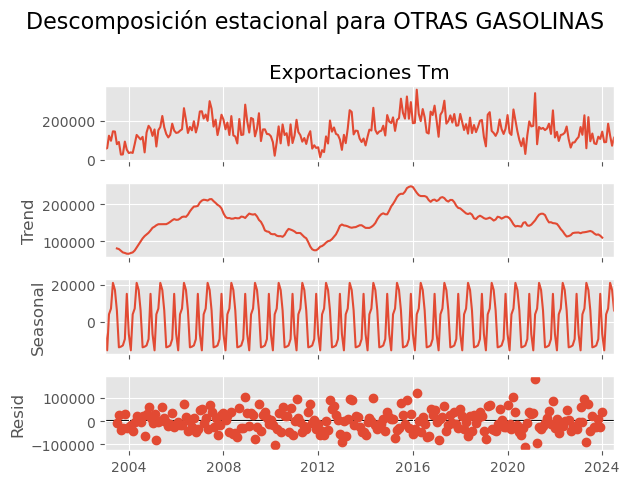

Resultados del test ADF para FUELÓLEO  BIA:
Estadístico ADF: -2.1296979346968197
Valor p: 0.2327417708179248
Valores críticos:
	1%: -3.457105309726321
	5%: -2.873313676101283
	10%: -2.5730443824681606




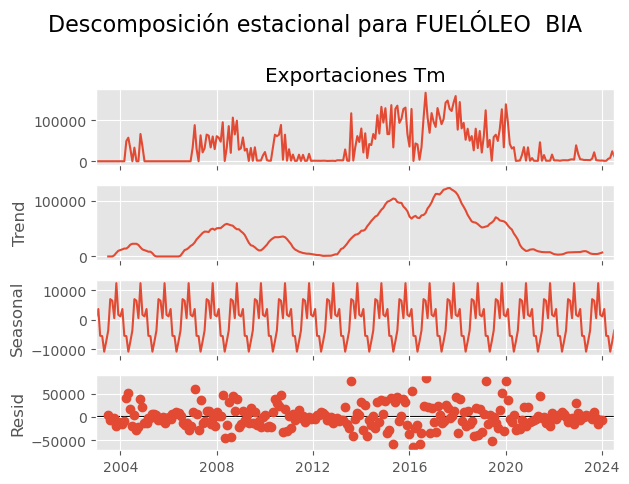

Resultados del test ADF para OTROS FUELÓLEOS:
Estadístico ADF: -6.487598560544989
Valor p: 1.2496092588434208e-08
Valores críticos:
	1%: -3.4560535712549925
	5%: -2.8728527662442334
	10%: -2.5727985212493754




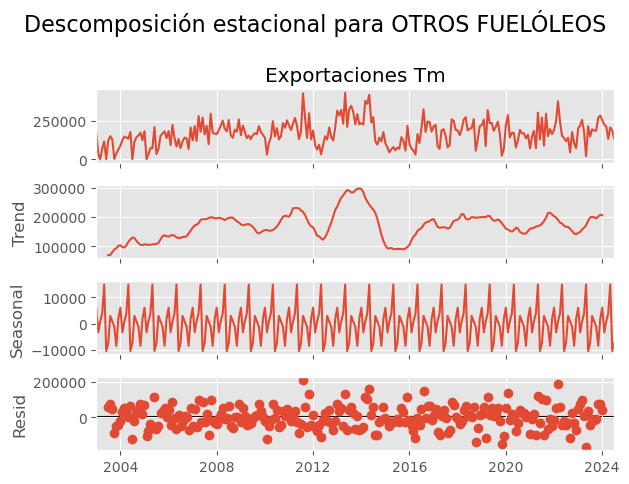

Resultados del test ADF para QUEROSENO AVIACIÓN:
Estadístico ADF: -2.264366925623133
Valor p: 0.18371793411385834
Valores críticos:
	1%: -3.457105309726321
	5%: -2.873313676101283
	10%: -2.5730443824681606




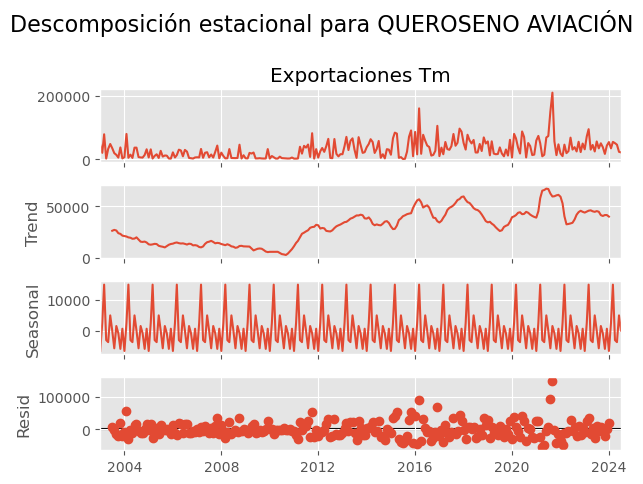

Resultados del test ADF para OTROS QUEROSENOS:
Estadístico ADF: -16.0639680771388
Valor p: 5.599542765020806e-29
Valores críticos:
	1%: -3.455952927706342
	5%: -2.8728086526320302
	10%: -2.572774990685656




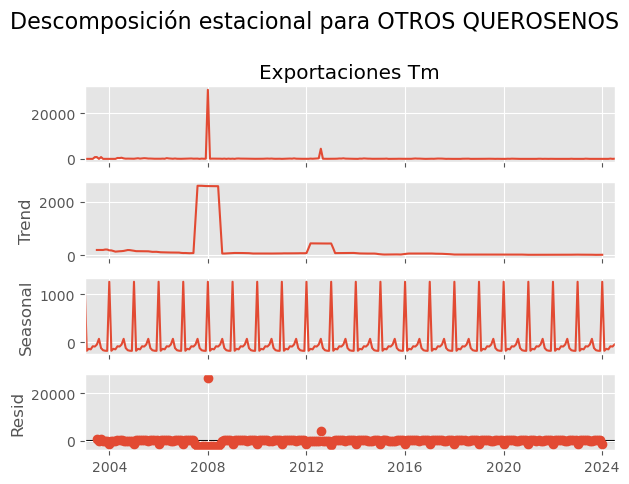

Resultados del test ADF para GLP:
Estadístico ADF: -1.4704556673569167
Valor p: 0.5480726072397673
Valores críticos:
	1%: -3.457105309726321
	5%: -2.873313676101283
	10%: -2.5730443824681606




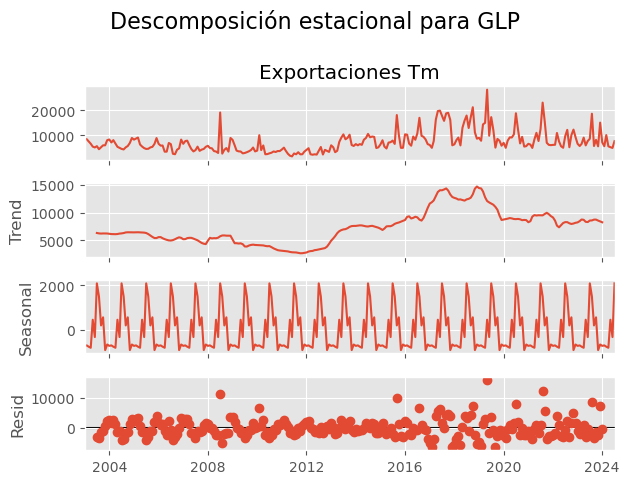

In [70]:
# Función para evaluar la estacionariedad de una serie mediante el test ADF
def adf_test(series, producto):
    result = adfuller(series, autolag='AIC')
    print(f"Resultados del test ADF para {producto}:")
    print(f"Estadístico ADF: {result[0]}")
    print(f"Valor p: {result[1]}")
    print("Valores críticos:")
    for key, value in result[4].items():
        print(f"\t{key}: {value}")
    print("\n")

# Realizamos el test ADF y la descomposición estacional en cada tipo de producto
productos = data['Tipo Producto'].unique()
for producto in productos:
    subset = data[data['Tipo Producto'] == producto].set_index('Fecha')
    serie = subset['Exportaciones Tm']
    
    # Prueba de Dickey-Fuller
    adf_test(serie, producto)
    
    # Descomposición estacional
    decomposition = seasonal_decompose(serie, model='additive', period=12)
    
    fig = decomposition.plot()
    fig.suptitle(f"Descomposición estacional para {producto}", fontsize=16, y=1)  # Para ajustar posición del título
    plt.tight_layout()  # Para ajustar el espacio entre subplots
    plt.show()

#### Análisis de resultados
Los resultados de la descomposición estacional y del test de Dickey-Fuller Aumentado (ADF) para las exportaciones de biodiésel sugieren una serie no estacionaria. En la descomposición estacional, observamos cuatro componentes:

    · Serie Original: La serie muestra un crecimiento inicial leve seguido de un incremento marcado a partir de 2010 y una estabilización desde 2020, lo cual sugiere una tendencia a largo plazo.

    · Tendencia: La tendencia confirma esta evolución, mostrando un crecimiento sostenido y luego una leve reducción reciente.

    · Estacionalidad: El componente estacional presenta un patrón periódico fuerte y consistente a lo largo de los años, con repeticiones anuales, indicando estacionalidad regular en la serie.

    · Residuo: La componente residual exhibe variaciones alrededor de cero, pero se intensifica en los últimos años, lo cual sugiere volatilidad en las exportaciones recientes no explicada por tendencia ni estacionalidad.

El test ADF respalda estos hallazgos al arrojar un valor p de 0.697, superior al umbral de 0.05, lo cual implica que no podemos rechazar la hipótesis nula de no estacionariedad. Por lo tanto, la serie de exportaciones de biodiésel tiene una tendencia significativa y un componente estacional marcado, confirmando que no es estacionaria y requerirá transformaciones adicionales (como diferenciarla) para análisis de predicción en un modelo de series temporales.

En cambio, los resultados para las exportaciones de gasóleo B (tercer gráfico) muestran un valor p de 0.027, inferior al umbral de 0.05, lo cual indica que podemos rechazar la hipótesis nula de no estacionariedad, aunque el estadístico ADF está muy cercano al valor crítico de 5%. Esto sugiere que la serie tiene algunos componentes de estacionalidad.

## Selección de la variable objetivo
Con base en estos criterios, biodiésel es la serie que mejor cumple con el requisito de no-estacionalidad según la prueba ADF. Seleccionamos la variable de exportaciones de biodiésel como variable objetivo, ya que cumple con los requisitos de no-estacionalidad definidos en el ejercicio, es decir, tiene un valor p superior a 0.05 en la prueba ADF, indicando una serie no estacionaria en su forma original.